In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("FR.csv")

In [3]:
df

,title,author,pub_date,text,page_num
0,La cuisine française (3e édition) / par A. Gog...,"Gogué, Antoine. Auteur du texte",1865,NaN,2
1,La cuisine française (3e édition) / par A. Gog...,"Gogué, Antoine. Auteur du texte",1865,NaN,3
2,La cuisine française (3e édition) / par A. Gog...,"Gogué, Antoine. Auteur du texte",1865,NaN,4
3,La cuisine française (3e édition) / par A. Gog...,"Gogué, Antoine. Auteur du texte",1865,NaN,5
4,La cuisine française (3e édition) / par A. Gog...,"Gogué, Antoine. Auteur du texte",1865,NaN,6
...,...,...,...,...,...
14648,Le guide culinaire,"Escoffier, Auguste (1846-1935). Auteur du texte",1912,NaN,986
14649,Le guide culinaire,"Escoffier, Auguste (1846-1935). Auteur du texte",1912,"\ -^' \ . ^ V &gt; \ '°*( /, V, &gt; y \ ' • &...",987
14650,Le guide culinaire,"Escoffier, Auguste (1846-1935). Auteur du texte",1912,&lt;■ f ... * —'. \ i A ) 1 ^ / - - ^ fs . ' (...,988
14651,Le guide culinaire,"Escoffier, Auguste (1846-1935). Auteur du texte",1912,[texte_manquant],989


In [4]:
df["num_words"] = df["text"].str.count(" ")
df["num_margarine"] = df["text"].str.count("margarine", re.I)
df["num_vegetaline"] = df["text"].str.count("v.g.taline|cocose|laur.ol|palmine", re.I)
df["num_butter"] = df["text"].str.count("beurre", re.I)
df["num_arachide"] = df["text"].str.count("arachide", re.I)
df["num_huile"] = df["text"].str.count("huile", re.I)
df["num_coco"] = df["text"].str.count("coco[\s|s|\.]", re.I)
df["num_saindoux"] = df["text"].str.count("saindoux", re.I)

In [5]:
df["num_friture"] = df["text"].str.count("frit|frire", re.I)

In [48]:
df["num_test"] = df["text"].str.count("lipide|glucide|protéine", re.I)

In [49]:
pivoted_df = pd.pivot_table(df, values=['num_words', 
                                        'num_butter', 
                                        'num_friture', 
                                        'num_saindoux', 
                                        'num_margarine', 
                                        'num_huile', 
                                        'num_arachide', 
                                        'num_coco',
                                        'num_test'], index=['title','pub_date'], aggfunc=np.sum)

In [50]:
pivoted_df["butter_rel"] = pivoted_df["num_butter"] / pivoted_df["num_words"]
pivoted_df["friture_rel"] = pivoted_df["num_friture"] / pivoted_df["num_words"]
pivoted_df["saindoux_rel"] = pivoted_df["num_saindoux"] / pivoted_df["num_words"]
pivoted_df["margarine_rel"] = pivoted_df["num_margarine"] / pivoted_df["num_words"]
pivoted_df["huile_rel"] = pivoted_df["num_huile"] / pivoted_df["num_words"]
pivoted_df["arachide_rel"] = pivoted_df["num_arachide"] / pivoted_df["num_words"]
pivoted_df["coco_rel"] = pivoted_df["num_coco"] / pivoted_df["num_words"]
pivoted_df["test_rel"] = pivoted_df["num_test"] / pivoted_df["num_words"]

In [51]:
pivoted_df["date"] = pivoted_df.index.get_level_values(level=1)

In [52]:
def plot_term(axs, row, col, series, title):
    axs[row][col].scatter(pivoted_df["date"], pivoted_df[series])
    axs[row][col].set_title(title)
    z = np.polyfit(pivoted_df["date"], pivoted_df[series], 1)
    p = np.poly1d(z)
    axs[row][col].plot(pivoted_df["date"],p(pivoted_df["date"]),"r--", alpha=.2)

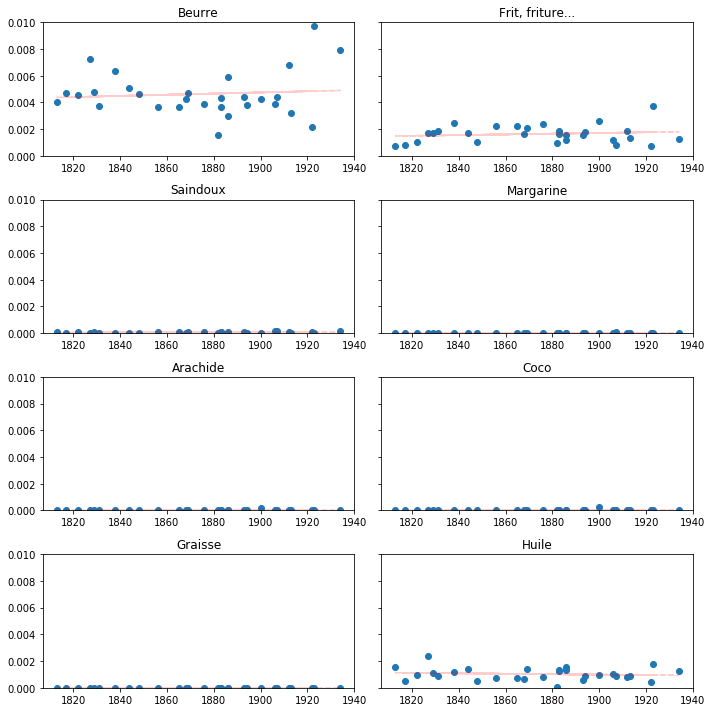

In [53]:
f, axs = plt.subplots(4, 2, sharey=True, figsize=(10,10))
axes = plt.gca()
axes.set_ylim([0,0.01])

plot_term(axs, 0, 0, "butter_rel", "Beurre")
plot_term(axs, 0, 1, "friture_rel", "Frit, friture...")
plot_term(axs, 1, 0, "saindoux_rel", "Saindoux")
plot_term(axs, 1, 1, "margarine_rel", "Margarine")
plot_term(axs, 2, 0, "arachide_rel", "Arachide")
plot_term(axs, 2, 1, "coco_rel", "Coco")
plot_term(axs, 3, 0, "test_rel", "Graisse")
plot_term(axs, 3, 1, "huile_rel", "Huile")

f.tight_layout()